In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
# Cargar el dataset
dataset_path = "C:/Users/ASUS TUF GAMING A15/Desktop/erick/cico/5to Semestre/IA/Ochoa Paz Erick - SIS420/Primer parcial/weather_10000.xlsx"
df = pd.read_excel(dataset_path)

In [ ]:
#Separar variables predictoras y objetivo
X = df[["Humidity (%)", "Wind Speed (m/s)", "Pressure (hPa)", "Solar Radiation (W/m²)"]].values
y = df["Temperature (°C)"].values.reshape(-1, 1)

In [12]:
# Normalización
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [13]:
# Convertir a tensores de PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [14]:
# DataLoader
train_ds = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)

In [20]:
# Definir el modelo MLP
RNtemp = nn.Sequential(
    nn.Linear(4, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

# Definir función de pérdida y optimizador
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(RNtemp.parameters(), lr=0.001)


In [21]:
#Entrenar el modelo
epochs = 100
loss_history = []

for epoch in range(epochs):
    RNtemp.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        pred = RNtemp(xb)
        loss = loss_fn(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    loss_history.append(epoch_loss / len(train_loader))
    if epoch % 10 == 0 or epoch == epochs - 1:
        print(f"Época {epoch}: pérdida = {loss_history[-1]:.4f}")


Época 0: pérdida = 0.2355
Época 10: pérdida = 0.0863
Época 20: pérdida = 0.0861
Época 30: pérdida = 0.0844
Época 40: pérdida = 0.0848
Época 50: pérdida = 0.0843
Época 60: pérdida = 0.0834
Época 70: pérdida = 0.0833
Época 80: pérdida = 0.0838
Época 90: pérdida = 0.0829
Época 99: pérdida = 0.0832


In [22]:
# Evaluar el modelo
RNtemp.eval()
with torch.no_grad():
    y_pred_scaled = RNtemp(X_test_tensor).numpy()
    y_pred = scaler_y.inverse_transform(y_pred_scaled)
    y_test_real = scaler_y.inverse_transform(y_test_tensor)

In [23]:
# Métricas
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test_real, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_real, y_pred)

print(f"\nEvaluación del modelo:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


Evaluación del modelo:
MSE: 24.9607
RMSE: 4.9961
R²: 0.9170


GRAFICOS

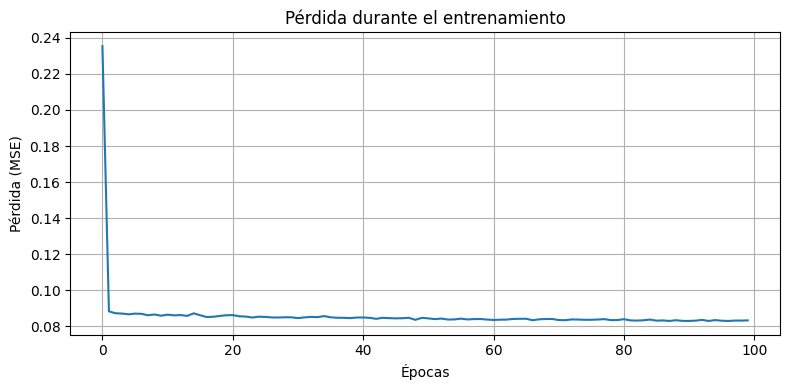

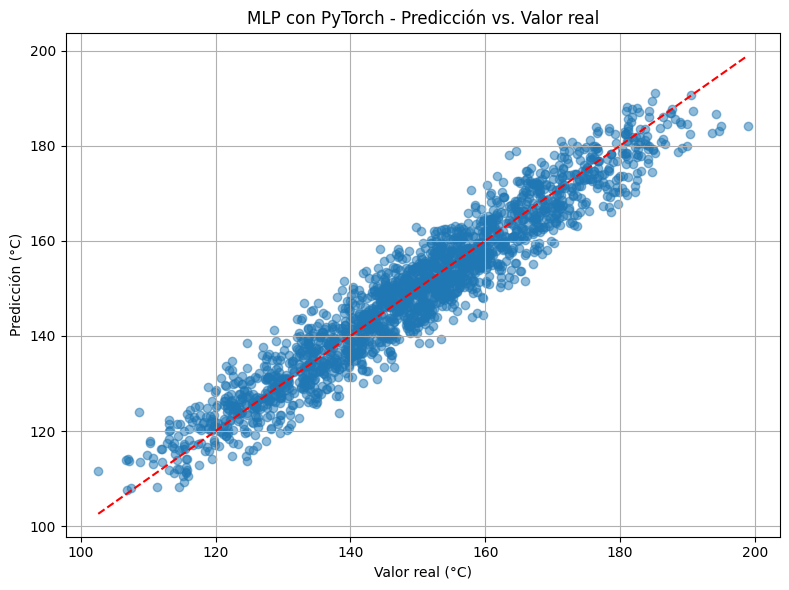

In [24]:
plt.figure(figsize=(8, 4))
plt.plot(loss_history)
plt.xlabel("Épocas")
plt.ylabel("Pérdida (MSE)")
plt.title("Pérdida durante el entrenamiento")
plt.grid(True)
plt.tight_layout()
plt.show()

# 14. Gráfico: predicción vs. valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test_real, y_pred, alpha=0.5)
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()], 'r--')
plt.xlabel("Valor real (°C)")
plt.ylabel("Predicción (°C)")
plt.title("MLP con PyTorch - Predicción vs. Valor real")
plt.grid(True)
plt.tight_layout()
plt.show()